# Bata blast explosion seen with Coherence Change Detection
HIGHLIGHTS
• The UN Disaster Assessment and Coordination
(UNDAC) team and UN Department of Disarmament
experts arrive in Bata to support with coordination,
assessments, and other aspects of the response.
• The death toll from the Bata explosions stands at 107.
At least 119 people, mainly children, remain
hospitalized.
• A state funeral for victims of the Bata explosions was
held on 12 March.
• According to UNICEF, about 150 families are
displaced and staying in temporary shelters.
Children account for nearly one-third of the displaced.
• Updated analysis from UNITAR shows that 243
structures are heavily damaged or destroyed. 300,000
people live within a 10km distance from the epicenter
of the blast.
• The explosion site remains accessible to civilians who
collect scrap metal from damaged ammunition, which
poses safety and security concerns. 
https://reliefweb.int/sites/reliefweb.int/files/resources/Flash%20Update_Equatorial%20Guinea_4_EN.pdf

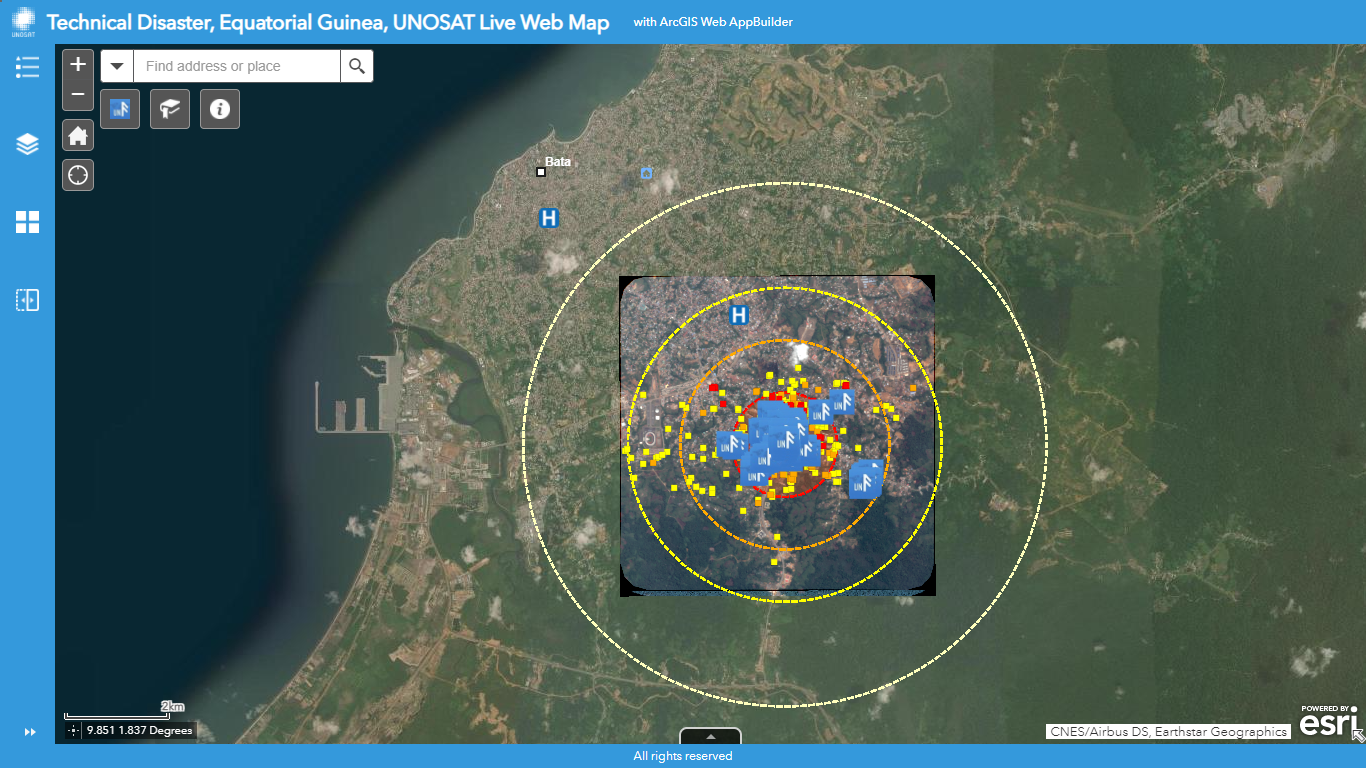

## Importing / installing needed libraries

In [1]:
#@title libraries for input data 
try:
  import ipywidgets as widgets
except:
  import ipywidgets as widgets
import zipfile
import os
import glob
try:
  import fiona
except:
  !pip install fiona
  import fiona
from shapely.geometry import shape


     |████████████████████████████████| 14.8MB 316kB/s 


## Defining parameters for data discovering / processing

In [2]:
#@title Upload shapefile over AoI (zip format)

myupload = widgets.FileUpload(
    accept= '.zip', 
    multiple=False  
)
myupload

FileUpload(value={}, accept='.zip', description='Upload')

In [3]:
#@title Select start date from the calendar
startdate=widgets.DatePicker(
    description='Start Date',
    disabled=False
)
startdate

DatePicker(value=None, description='Start Date')

In [4]:
#@title Select stop date as day after event
stopdate=widgets.DatePicker(
    description='Event Date',
    disabled=False
)
stopdate

DatePicker(value=None, description='Event Date')

## Decompressing file and reading Bounding Box coordinates

In [5]:
#@title Obtaining footprint from shapefile
## Discovering selected file
print(myupload.value)
uploaded_filename = next(iter(myupload.value))
content = myupload.value[uploaded_filename]['content']
filename=myupload.metadata[0]['name']
print('#############################################')
print('Selected file: '+filename)
# Uploading file in notebook / server
print('#############################################')
print('Uploading file: '+filename)
with open(filename, 'wb') as f: f.write(content)

## Unzipping file
print('#############################################')
print('Unzipping file: '+filename)
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

## Finding file and reading coordinates
print('#############################################')
print('Extracting Bounding Box from shapefile')
shpfile=glob.glob(os.path.join(os.getcwd(),'*.shp'))
print(shpfile)
c = fiona.open(shpfile[0])
#print(c.bounds)
lonmin,latmin,lonmax,latmax=c.bounds
#print(lonmin)
#print(latmin)
footprint='POLYGON(('+str(lonmin)+' '+str(latmin)+','+str(lonmin)+' '+str(latmax)+','+str(lonmax)+' '+str(latmax)+','+str(lonmax)+' '+str(latmin)+','+str(lonmin)+' '+str(latmin)+'))'
print('Shapefile footprint')
print(footprint)
########
# Selected data
starttime=startdate.value.strftime('%Y%m%d')
stoptime=stopdate.value.strftime('%Y%m%d')
print('#########################################')
print('Start date: '+starttime)
print('Stop date: '+stoptime)
acdate=(starttime,stoptime)

{'BataLarge.zip': {'metadata': {'lastModified': 1616698701255, 'type': 'application/x-zip-compressed', 'name': 'BataLarge.zip', 'size': 1217}, 'content': b'PK\x03\x04\n\x03\x00\x00\x00\x00H\x9fyRP<\x81\x0e\x05\x00\x00\x00\x05\x00\x00\x00\x16\x00\x00\x00Bata_large-polygon.cpgUTF-8PK\x03\x04\x14\x03\x00\x00\x08\x00I\x9fyR\xc1\\\x06\x18W\x00\x00\x00,\x01\x00\x00\x16\x00\x00\x00Bata_large-polygon.dbf\xcd\x89\xb1\t\x800\x10EORY8\x80VY\xc1\x15\xb4\x0fn \x87~$\x10Qr\xd7X\xba\x8eSJ\xc0*d\x00_\xf1\xf9\x8fg.\xd3VDt\xd3C%\x1c\xef\xf8\xee\x98f\xca\xfa\nY\xa2?\xd5\x1f\xe5\xae\x10A\x08\xac \x97\xbc\xcezc\x07V\x9e\x03\xc7\r\xf6\xd7\xf4\xdd\x0bPK\x03\x04\x14\x03\x00\x00\x08\x00I\x9fyR\xe3\xc1Qjy\x00\x00\x00\x8f\x00\x00\x00\x16\x00\x00\x00Bata_large-polygon.prjM\xcc1\x0f\xc2 \x10\x05\xe0\xff\xc2L\x9ar@\xe1F#\x04\x19j\x9b\xd2\xc6\x81\\:\x18\xa2.\x0e.\xfe}o\xb3\xcb\xcb\xcb\x97\xbc\x97\xe2\x94\xce\xa5\n\x8e\xfd\x96\xca\xae\xd0\x1b!\xc3i\xdd\xc6*\xc2\x81\xca|\x89\xcb\x94C\x15\x7f\x1b\xb4\xf3J;\t\xe8;\xb0\x

## Search Satellite data

In [7]:
#@title install libraries for satellite data download
try:
  import sentinelsat
except:
  !pip install sentinelsat
  import sentinelsat


In [ ]:
#@title Selecting Relative Orbit
print('For running this case track=132')
track=132

In [10]:
#@title Searching and downloading files
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
import getpass
print('Introduce user')
user=input()
print('Introduce password')
password = getpass.getpass()

#acdate=('20210215','20210312')
#api = SentinelAPI('getmydata', 'getmydata')
api = SentinelAPI(user,password)

#footprint = geojson_to_wkt(read_geojson('search_polygon.geojson'))
footprint='POLYGON(('+str(lonmin)+' '+str(latmin)+','+str(lonmin)+' '+str(latmax)+','+str(lonmax)+' '+str(latmax)+','+str(lonmax)+' '+str(latmin)+','+str(lonmin)+' '+str(latmin)+'))'
products = api.query(footprint,
                     producttype='SLC',
                     date = acdate,
                     relativeOrbitNumber=track,)
                    # orbitdirection='Descending')
print(products)
# Downloading the files in /content folder
api.download_all(products)
dataset=api.to_dataframe(products)
print(dataset)

Introduce user
getmydata
Introduce password
··········
OrderedDict([('7c05e35a-69d3-4b52-96b7-78c581cf44fb', {'title': 'S1A_IW_SLC__1SDV_20210311T173555_20210311T173625_036954_045905_5225', 'link': "https://scihub.copernicus.eu/apihub/odata/v1/Products('7c05e35a-69d3-4b52-96b7-78c581cf44fb')/$value", 'link_alternative': "https://scihub.copernicus.eu/apihub/odata/v1/Products('7c05e35a-69d3-4b52-96b7-78c581cf44fb')/", 'link_icon': "https://scihub.copernicus.eu/apihub/odata/v1/Products('7c05e35a-69d3-4b52-96b7-78c581cf44fb')/Products('Quicklook')/$value", 'summary': 'Date: 2021-03-11T17:35:55.197Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 7.71 GB', 'ondemand': 'false', 'beginposition': datetime.datetime(2021, 3, 11, 17, 35, 55, 197000), 'endposition': datetime.datetime(2021, 3, 11, 17, 36, 25, 9000), 'ingestiondate': datetime.datetime(2021, 3, 12, 22, 8, 45, 369000), 'missiondatatakeid': 284933, 'slicenumber': 1, 'orbitnumber': 36954, 'lastorbitnumber': 36954, 'rel

Downloading: 100%|██████████| 5.09G/5.09G [14:52<00:00, 5.71MB/s]
MD5 checksumming: 100%|██████████| 5.09G/5.09G [00:12<00:00, 403MB/s]


                                                                                  title  ...                                  uuid
7c05e35a-69d3-4b52-96b7-78c581cf44fb  S1A_IW_SLC__1SDV_20210311T173555_20210311T1736...  ...  7c05e35a-69d3-4b52-96b7-78c581cf44fb
4eb529ab-33ac-4399-a249-505366060392  S1A_IW_SLC__1SDV_20210227T173555_20210227T1736...  ...  4eb529ab-33ac-4399-a249-505366060392
c14bd830-8b7f-4aa8-a009-909476c9b732  S1A_IW_SLC__1SDV_20210215T173555_20210215T1736...  ...  c14bd830-8b7f-4aa8-a009-909476c9b732

[3 rows x 35 columns]


In [11]:
#@title Installing packages for S1 data processing
# Installing packages for S1 data processing
!apt-get install -y libfftw3-dev libtiff5-dev gdal-bin gfortran libgfortran5 libgfortran3 jblas git
# Downloading the package
!wget http://step.esa.int/downloads/6.0/installers/esa-snap_sentinel_unix_6_0.sh
# configuration of installation parameters for Sentinel-1 Toolbox only
!TBX=esa-snap_sentinel_unix_6_0.sh ; chmod +x $TBX ; echo -e "deleteAllSnapEngineDir\$Boolean=false\ndeleteOnlySnapDesktopDir\$Boolean=false\nexecuteLauncherWithPythonAction\$Boolean=false\nforcePython\$Boolean=false\npythonExecutable=/usr/bin/python\nsys.adminRights\$Boolean=true\nsys.component.RSTB\$Boolean=true\nsys.component.S1TBX\$Boolean=true\nsys.component.S2TBX\$Boolean=false\nsys.component.S3TBX\$Boolean=false\nsys.component.SNAP\$Boolean=true\nsys.installationDir="$PWD"/snap\nsys.languageId=en\nsys.programGroupDisabled\$Boolean=false\nsys.symlinkDir=/usr/local/bin" >$PWD/snap.varfile ; ./$TBX -q -varfile $PWD/snap.varfile
# Updating SNAP
#!$PWD/snap/bin/snap --nosplash --nogui --modules --update-all
# Configuring memory and parameters
!echo "-Xmx8G" > $PWD/snap/bin/gpt.vmoptions

#!cp /content/drive/My\ Drive/WB_Coherence/snap.properties $PWD/snap/bin/.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.8).
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.4).
libtiff5-dev set to manually installed.
The following additional packages will be installed:
  gcc-6-base libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  jblas-doc libfftw3-doc
The following NEW packages will be installed:
  gcc-6-base jblas libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3
  libfftw3-single3 libgfortran3 libgfortran5
0 upgraded, 9 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,803 kB of archives.
After this operation, 25.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 gcc-6-base amd64 6.5.0-2ubuntu1~18.04 [16.7 kB]
Get:2 h

In [12]:
#@title configuring snap (I/II)
%%writefile ./snap/etc/snap.auxdata.properties
####################################################################################
# Configuration for the Auxdata paths
# All properties described here can also be passed to the VM as system
# properties using the standard Java
#   -D<property>=<value>
# syntax. In addition, it is possible to use macros of the form
#   ${<property>}
# within a value. Macros will expand to the value of the referred file property,
# system property, or environment variable.
####################################################################################

#AuxDataPath = c:\\AuxData2
demPath = ${AuxDataPath}/dem

DEM.aceDEMDataPath = ${demPath}/ACE_DEM/ACE
DEM.aceDEM_HTTP = http://step.esa.int/auxdata/dem/ACE30/
DEM.ace2_5MinDEMDataPath = ${demPath}/ACE2/5M_HEIGHTS
DEM.ace2_5MinDEM_HTTP = http://step.esa.int/auxdata/dem/ACE2/5M/
DEM.CDEM_HTTP = http://step.esa.int/auxdata/dem/cdem/
DEM.gtopo30DEMDataPath = ${demPath}/GTOPO30/dem
DEM.AsterDEMDataPath = ${demPath}/ASTER
DEM.Getasse30DEMDataPath = ${demPath}/GETASSE30
DEM.srtm3GeoTiffDEMDataPath = ${demPath}/SRTM_DEM/tiff
DEM.srtm3GeoTiffDEM_FTP = xftp.jrc.it
DEM.srtm3GeoTiffDEM_remotePath = /pub/srtmV4/tiff/
DEM.srtm3GeoTiffDEM_HTTP = http://srtm.csi.cgiar.org/SRT-ZIP/SRTM_V41/SRTM_Data_GeoTiff/
DEM.srtm1HgtDEM_HTTP = http://step.esa.int/auxdata/dem/SRTMGL1/
DEM.srtm1GridDEMDataPath =

landCoverPath = ${AuxDataPath}/LandCover
LandCover.glc2000DataPath = ${landCoverPath}/glc2000
LandCover.globcoverDataPath = ${landCoverPath}/globcover

OrbitFiles.dorisHTTP_vor_remotePath = http://step.esa.int/auxdata/orbits/Doris/vor
OrbitFiles.dorisVOROrbitPath = ${AuxDataPath}/Orbits/Doris/vor
OrbitFiles.dorisPOROrbitPath = ${AuxDataPath}/Orbits/Doris/por
		
OrbitFiles.delftEnvisatOrbitPath = ${AuxDataPath}/Orbits/Delft Precise Orbits/ODR.ENVISAT1/eigen-cg03c
OrbitFiles.delftERS1OrbitPath = ${AuxDataPath}/Orbits/Delft Precise Orbits/ODR.ERS-1/dgm-e04
OrbitFiles.delftERS2OrbitPath = ${AuxDataPath}/Orbits/Delft Precise Orbits/ODR.ERS-2/dgm-e04
		
OrbitFiles.delftFTP = dutlru2.lr.tudelft.nl
OrbitFiles.delftFTP_ENVISAT_precise_remotePath = /pub/orbits/ODR.ENVISAT1/eigen-cg03c/
OrbitFiles.delftFTP_ERS1_precise_remotePath = /pub/orbits/ODR.ERS-1/dgm-e04/
OrbitFiles.delftFTP_ERS2_precise_remotePath = /pub/orbits/ODR.ERS-2/dgm-e04/

OrbitFiles.prareHTTP_ERS1_remotePath = http://step.esa.int/auxdata/orbits/ers_precise_orb/ERS1
OrbitFiles.prareHTTP_ERS2_remotePath = http://step.esa.int/auxdata/orbits/ers_precise_orb/ERS2
OrbitFiles.prareERS1OrbitPath = ${AuxDataPath}/Orbits/ers_precise_orb/ERS1
OrbitFiles.prareERS2OrbitPath = ${AuxDataPath}/Orbits/ers_precise_orb/ERS2

OrbitFiles.sentinel1POEOrbitPath = ${AuxDataPath}/Orbits/Sentinel-1/POEORB
OrbitFiles.sentinel1RESOrbitPath = ${AuxDataPath}/Orbits/Sentinel-1/RESORB
OrbitFiles.sentinel1POEOrbit_remotePath = https://aux.sentinel1.eo.esa.int/POEORB
OrbitFiles.sentinel1RESOrbit_remotePath = https://aux.sentinel1.eo.esa.int/RESORB
AuxCal.Sentinel1.remotePath = http://step.esa.int/auxdata/auxcal/S1/
AuxCal.ENVISAT.remotePath = http://step.esa.int/auxdata/auxcal/ENVISAT/
AuxCal.ERS.remotePath = http://step.esa.int/auxdata/auxcal/ERS/


Overwriting ./snap/etc/snap.auxdata.properties


In [13]:
#@title configuring snap (II/II)
%%writefile ./snap/bin/snap.properties
# tileCache and tileSize jai properties affect graph processing and image rendering
# Tile cache size [Mb]
snap.jai.tileCacheSize=8196
# Default tile size in pixels
snap.jai.defaultTileSize=2048
# number of CPU cores used for image rendering and graph processing
# allow this to default to Runtime.getRuntime().availableProcessors()
#snap.parallelism = 8
# Enable or disable the prefetch of tiles. Default is true.
snap.jai.prefetchTiles=true

Writing ./snap/bin/snap.properties


In [14]:
#@title Defining parameters for satellite data processing
# Sentinel-1 SLC images
import glob
import os
images=sorted(glob.glob(os.path.join(os.getcwd(),'S1*zip')))
reference=images[1]
secondaries=[images[0],images[2]]

# Subswath 
print('Select one subswath [IW1,IW2,IW3] (default IW1)')
IWs=input()
if IWs=="":
  IWs='IW1'
print('Selected subswath:'+IWs)
# polarisation
print('Select polarisation [VV,VH] (default VV)')
polarisation=input()
if polarisation=='':
  polarisation='VV'
print('Selected polarisation:'+polarisation)

print(footprint)

# Defining graphs to be employed (Graph xml includes all steps to run using SNAP in command line)
#graphxml='/content/drive/MyDrive/WB_Coherence/WB_coherence.xml'
#graphxml='/content/drive/MyDrive/WB_Coherence/Beirut/WB_Coh_TC_Subset2.xml'
outputifgfolder=os.getcwd()
graphxml=os.path.join(os.getcwd(),'WB_Coh_TC_Subset2.xml')
graph2run=os.path.join(os.getcwd(),'graph2run.xml')

POLYGON((9.707026517033672 1.786073223865122,9.707026517033672 1.902081222082063,9.886584053457014 1.902081222082063,9.886584053457014 1.786073223865122,9.707026517033672 1.786073223865122))


In [15]:
#@title Defining SNAP processing graph to execute
%%writefile ./WB_Coh_TC_Subset2.xml 
<graph id="Graph">
  <version>1.0</version>
  <node id="Read">
    <operator>Read</operator>
    <sources/>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <file>REFERENCE</file>
    </parameters>
  </node>
  <node id="Read(2)">
    <operator>Read</operator>
    <sources/>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <file>SECONDARY</file>
    </parameters>
  </node>
  <node id="TOPSAR-Split">
    <operator>TOPSAR-Split</operator>
    <sources>
      <sourceProduct refid="Read"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <subswath>IWs</subswath>
      <selectedPolarisations>POLARISATION</selectedPolarisations>
      <firstBurstIndex>1</firstBurstIndex>
      <lastBurstIndex>9</lastBurstIndex>
      <wktAoi>POLYGON</wktAoi>
    </parameters>
  </node>
  <node id="TOPSAR-Split(2)">
    <operator>TOPSAR-Split</operator>
    <sources>
      <sourceProduct refid="Read(2)"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <subswath>IWs</subswath>
      <selectedPolarisations>POLARISATION</selectedPolarisations>
      <firstBurstIndex>1</firstBurstIndex>
      <lastBurstIndex>10</lastBurstIndex>
      <wktAoi/>
    </parameters>
  </node>
  <node id="Apply-Orbit-File">
    <operator>Apply-Orbit-File</operator>
    <sources>
      <sourceProduct refid="TOPSAR-Split"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <orbitType>Sentinel Precise (Auto Download)</orbitType>
      <polyDegree>3</polyDegree>
      <continueOnFail>false</continueOnFail>
    </parameters>
  </node>
  <node id="Apply-Orbit-File(2)">
    <operator>Apply-Orbit-File</operator>
    <sources>
      <sourceProduct refid="TOPSAR-Split(2)"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <orbitType>Sentinel Precise (Auto Download)</orbitType>
      <polyDegree>3</polyDegree>
      <continueOnFail>false</continueOnFail>
    </parameters>
  </node>
  <node id="Back-Geocoding">
    <operator>Back-Geocoding</operator>
    <sources>
      <sourceProduct refid="Apply-Orbit-File"/>
      <sourceProduct.1 refid="Apply-Orbit-File(2)"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <demName>SRTM 1Sec HGT</demName>
      <demResamplingMethod>BILINEAR_INTERPOLATION</demResamplingMethod>
      <externalDEMFile/>
      <externalDEMNoDataValue>0.0</externalDEMNoDataValue>
      <resamplingType>BISINC_21_POINT_INTERPOLATION</resamplingType>
      <maskOutAreaWithoutElevation>true</maskOutAreaWithoutElevation>
      <outputRangeAzimuthOffset>false</outputRangeAzimuthOffset>
      <outputDerampDemodPhase>false</outputDerampDemodPhase>
      <disableReramp>false</disableReramp>
    </parameters>
  </node>
  <node id="TOPSAR-Deburst">
    <operator>TOPSAR-Deburst</operator>
    <sources>
      <sourceProduct refid="Coherence"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <selectedPolarisations>POLARISATION</selectedPolarisations>
    </parameters>
  </node>
  <node id="Coherence">
    <operator>Coherence</operator>
    <sources>
      <sourceProduct refid="Back-Geocoding"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <cohWinAz>3</cohWinAz>
      <cohWinRg>10</cohWinRg>
      <subtractFlatEarthPhase>true</subtractFlatEarthPhase>
      <srpPolynomialDegree>5</srpPolynomialDegree>
      <srpNumberPoints>501</srpNumberPoints>
      <orbitDegree>3</orbitDegree>
      <squarePixel>true</squarePixel>
      <subtractTopographicPhase>true</subtractTopographicPhase>
      <demName>SRTM 1Sec HGT</demName>
      <externalDEMFile/>
      <externalDEMNoDataValue>0.0</externalDEMNoDataValue>
      <externalDEMApplyEGM>true</externalDEMApplyEGM>
      <tileExtensionPercent>100</tileExtensionPercent>
   <!--   <singleMaster>true</singleMaster> -->
    </parameters>
  </node>
  <node id="Terrain-Correction">
    <operator>Terrain-Correction</operator>
    <sources>
      <sourceProduct refid="TOPSAR-Deburst"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <sourceBands/>
      <demName>SRTM 1Sec HGT</demName>
      <externalDEMFile/>
      <externalDEMNoDataValue>0.0</externalDEMNoDataValue>
      <externalDEMApplyEGM>true</externalDEMApplyEGM>
      <demResamplingMethod>BILINEAR_INTERPOLATION</demResamplingMethod>
      <imgResamplingMethod>BILINEAR_INTERPOLATION</imgResamplingMethod>
      <pixelSpacingInMeter>20.0</pixelSpacingInMeter>
      <pixelSpacingInDegree>1.796630568239043E-4</pixelSpacingInDegree>
      <mapProjection>GEOGCS[&quot;WGS84(DD)&quot;, &#xd;
  DATUM[&quot;WGS84&quot;, &#xd;
    SPHEROID[&quot;WGS84&quot;, 6378137.0, 298.257223563]], &#xd;
  PRIMEM[&quot;Greenwich&quot;, 0.0], &#xd;
  UNIT[&quot;degree&quot;, 0.017453292519943295], &#xd;
  AXIS[&quot;Geodetic longitude&quot;, EAST], &#xd;
  AXIS[&quot;Geodetic latitude&quot;, NORTH]]</mapProjection>
      <alignToStandardGrid>false</alignToStandardGrid>
      <standardGridOriginX>0.0</standardGridOriginX>
      <standardGridOriginY>0.0</standardGridOriginY>
      <nodataValueAtSea>true</nodataValueAtSea>
      <saveDEM>false</saveDEM>
      <saveLatLon>false</saveLatLon>
      <saveIncidenceAngleFromEllipsoid>false</saveIncidenceAngleFromEllipsoid>
      <saveLocalIncidenceAngle>false</saveLocalIncidenceAngle>
      <saveProjectedLocalIncidenceAngle>false</saveProjectedLocalIncidenceAngle>
      <saveSelectedSourceBand>true</saveSelectedSourceBand>
      <outputComplex>false</outputComplex>
      <applyRadiometricNormalization>false</applyRadiometricNormalization>
      <saveSigmaNought>false</saveSigmaNought>
      <saveGammaNought>false</saveGammaNought>
      <saveBetaNought>false</saveBetaNought>
      <incidenceAngleForSigma0>Use projected local incidence angle from DEM</incidenceAngleForSigma0>
      <incidenceAngleForGamma0>Use projected local incidence angle from DEM</incidenceAngleForGamma0>
      <auxFile>Latest Auxiliary File</auxFile>
      <externalAuxFile/>
    </parameters>
  </node>
  <node id="Subset">
    <operator>Subset</operator>
    <sources>
      <sourceProduct refid="Terrain-Correction"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <sourceBands/>
      <region>0,0,5485,1857</region>
  <!--    <referenceBand/> -->
      <geoRegion>POLYGON</geoRegion>
      <subSamplingX>1</subSamplingX>
      <subSamplingY>1</subSamplingY>
      <fullSwath>false</fullSwath>
      <tiePointGridNames/>
      <copyMetadata>true</copyMetadata>
    </parameters>
  </node>
  <node id="Write">
    <operator>Write</operator>
    <sources>
      <sourceProduct refid="Subset"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <file>OUTPUTIFGFOLDER/OUTPUTFILE</file>
      <formatName>GeoTIFF-BigTIFF</formatName>
    </parameters>
  </node>
  <applicationData id="Presentation">
    <Description/>
    <node id="Read">
      <displayPosition x="25.0" y="13.0"/>
    </node>
    <node id="Read(2)">
      <displayPosition x="28.0" y="229.0"/>
    </node>
    <node id="TOPSAR-Split">
      <displayPosition x="16.0" y="50.0"/>
    </node>
    <node id="TOPSAR-Split(2)">
      <displayPosition x="11.0" y="194.0"/>
    </node>
    <node id="Apply-Orbit-File">
      <displayPosition x="12.0" y="84.0"/>
    </node>
    <node id="Apply-Orbit-File(2)">
      <displayPosition x="6.0" y="160.0"/>
    </node>
    <node id="Back-Geocoding">
      <displayPosition x="116.0" y="123.0"/>
    </node>
    <node id="TOPSAR-Deburst">
      <displayPosition x="339.0" y="124.0"/>
    </node>
    <node id="Coherence">
      <displayPosition x="241.0" y="125.0"/>
    </node>
    <node id="Terrain-Correction">
      <displayPosition x="491.0" y="123.0"/>
    </node>
    <node id="Subset">
      <displayPosition x="678.0" y="126.0"/>
    </node>
    <node id="Write">
      <displayPosition x="804.0" y="124.0"/>
    </node>
  </applicationData>
</graph>

Writing ./WB_Coh_TC_Subset2.xml


In [16]:
#@title Sentinel-1 data processing 
import time
import os
import subprocess

for secondary in secondaries:
  startproc=time.perf_counter()
  outputname=os.path.basename(reference)[17:25]+'_'+os.path.basename(secondary)[17:25]+'_'+IWs+'.tif'
  print(outputname)
  if not os.path.exists(outputname) and not os.path.isfile(outputname):
    with open(graphxml, 'r') as file :
        filedata = file.read()
    # Replace the target string
    filedata = filedata.replace('REFERENCE',reference)
    filedata = filedata.replace('SECONDARY', secondary)
    filedata = filedata.replace('OUTPUTIFGFOLDER', outputifgfolder)
    filedata = filedata.replace('OUTPUTFILE',outputname)
    filedata = filedata.replace('POLYGON',footprint)
    filedata = filedata.replace('POLARISATION',polarisation)
    filedata = filedata.replace('IWs',IWs)
    # Write the file out again
    with open(graph2run, 'w') as file:
        file.write(filedata)
    args = [os.path.join(os.getcwd(),'snap','bin','gpt'), graph2run, '-c', '8G', '-q', '16']
    print(args)
    # Launch the processing
    #timeStarted = time.time()
    process = subprocess.Popen(args,shell=False,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)

    # Poll process.stdout to show stdout live
    while True:
      output = process.stdout.readline()
      if process.poll() is not None:
        break
      if output:
        print (output.strip().decode('utf-8'))
    rc = process.poll()

    #timeDelta = time.time() - timeStarted                     # Get execution time.
    #print('Finished process in '+str(timeDelta)+' seconds.')

    stopproc=time.perf_counter()
    proctime=(stopproc-startproc)/60
    print('Processing completed in '+str(proctime)+' minutes')

20210227_20210215_IW1.tif
['/content/snap/bin/gpt', '/content/graph2run.xml', '-c', '8G', '-q', '16']
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
Currently installed 6.0, available is 8.0.0.
Please visit http://step.esa.int

Executing processing graph
INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.engine_utilities.download.downloadablecontent.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1A/2021/02/S1A_OPER_AUX_POEORB_OPOD_20210319T121609_V20210226T225942_20210228T005942.EOF.zip
INFO: org.esa.snap.engine_utilities.download.downloadablecontent.DownloadableContentImpl: http retrieving http://step.esa.int/auxdata/orbits/Sentinel-1/POEORB/S1A/2021/02/S1A_OPER_AUX_POEORB_OPOD_20210307T121851_V20210214T225942_20210216T005942.EOF.zip
Master: 27Feb2021
Slave: 27Feb2021 prep baseline: 0.0 temp baseline: 0.0
Slave: 15Feb2021 prep baseline: -8.992446 temp baselin

Define a coherence change threshold [0,1] :
Suggested threshold=0.4
0.4
['/content/20210227_20210215_IW1.tif', '/content/20210227_20210311_IW1.tif', '/content/Bata_CCC.tif']
Pre-event Coherence map


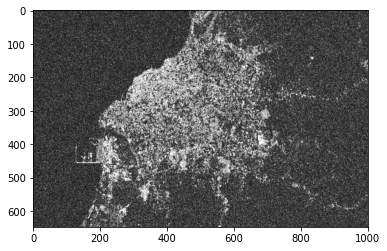

Post-event Coherence map


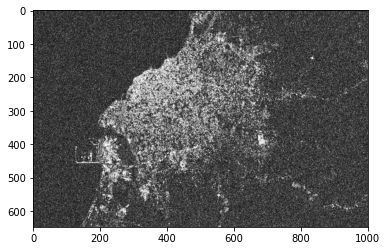

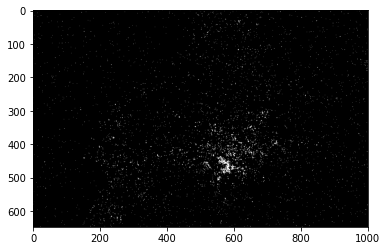

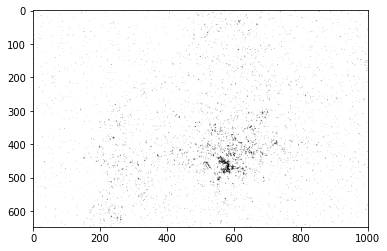


new profile: {'count': 3,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 647,
 'interleave': 'pixel',
 'nodata': 0.0,
 'tiled': False,
 'transform': Affine(0.0001796630568239043, 0.0, 9.70687871116772,
       0.0, -0.0001796630568239043, 1.9022153897530545),
 'width': 1001}



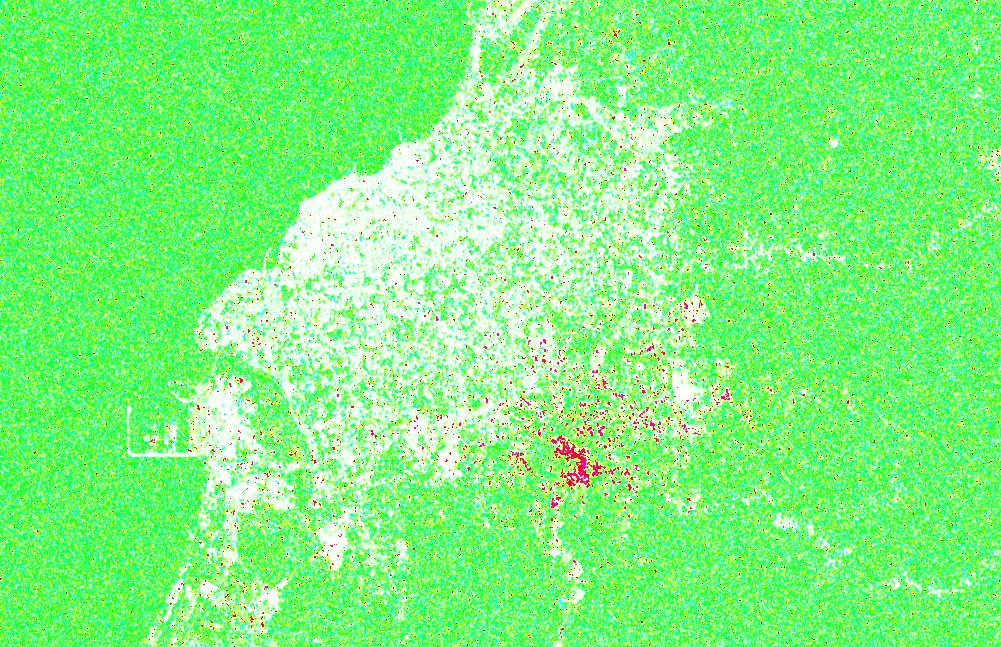

In [46]:
#@title Computing the Coherence change detection using SNAP outputs
try:
  import rasterio as rio
except:
  !pip install rasterio
  import rasterio as rio
from matplotlib import pyplot
import glob
import os

print('Define a coherence change threshold [0,1] :')
print('Suggested threshold=0.4')
threshold=input()

images=sorted(glob.glob(os.path.join(os.getcwd(),'*tif')))
print(images)
# Reading and plotting pre-event Coherence 
print('Pre-event Coherence map')
with rio.open(images[0]) as src:
  coh1=src.read(1)
  pyplot.imshow(src.read(1), cmap='gray')
  pyplot.show()
# Reading and plotting post-event Coherence
print('Post-event Coherence map')
with rio.open(images[1]) as src2:
  transform=src2.transform
  crs=src2.crs
  profile=src2.profile
  coh2=src2.read(1)
  pyplot.imshow(src2.read(1), cmap='gray')
  pyplot.show()


## Composing the RGB image for visual comparison
import numpy as np
channels=np.empty([3,coh1.shape[0],coh1.shape[1]],dtype=np.uint8)
from skimage import  img_as_ubyte
from skimage import exposure

diff=(coh1-coh2)>float(threshold)
pyplot.imshow(diff, cmap='gray')
pyplot.show()

diff=1-diff
pyplot.imshow(diff, cmap='gray')
pyplot.show()

for index,image in enumerate([coh1,diff,coh2]):
    stretched=exposure.equalize_hist(image)    
    channels[index,:,:] = img_as_ubyte(stretched)

tif_filename = os.path.join(os.getcwd(),'Bata_CCC.tif')
num_chans, height, width = channels.shape
with rio.open(tif_filename,'w',driver='GTiff',
                   height=height,width=width,
                   count=num_chans,dtype=channels.dtype,
                   crs=crs,transform=transform, nodata=0.0) as dst:
        dst.write(channels)

import pprint
# Plotting RGB
with rio.open(tif_filename) as infile:
    print(f"\nnew profile: {pprint.pformat(infile.profile)}\n")
    profile=infile.profile
    #
    # change the driver name from GTiff to PNG
    #
    profile['driver']='PNG'
    #
    # pathlib makes it easy to add a new suffix to a
    # filename
    #    
    png_filename=tif_filename.split('.')[0]+'.png'
    raster=infile.read()
    with rio.open(png_filename, 'w', **profile) as dst:
        dst.write(raster)
    #
    # now do jpeg
    #
    profile['driver']='JPEG'
    jpeg_filename=tif_filename.split('.')[0]+'.jpeg'
    with rio.open(jpeg_filename, 'w', **profile) as dst:
        dst.write(raster)

from IPython.display import Image
Image(str(jpeg_filename))

In [18]:
#@title importing libraries to plot maps
import folium
from folium import plugins
#from scipy.ndimage import imread
import glob

In [19]:
#@title Defining function to create browse images
# function definition of quicklook generation
from datetime import datetime
import time
from subprocess import Popen,PIPE,STDOUT

def quicklook_gen(image): #,colormap):
    now = datetime.now()
    tmpfolder=os.getcwd()
    cmd=['./snap/bin/pconvert','-b','1',image,'-f','png','-o',tmpfolder]
    print('#########################')
    print('Creating browse image')
    timeStarted = time.time()
    process = Popen(cmd, stdout=PIPE, stderr=STDOUT)
    r = b""
    for line in process.stdout:
        r += line
        print(str(line))
    process.wait()
    timeDelta = time.time() - timeStarted                     # Get execution time.
    print('Finished process in '+str(timeDelta)+' seconds.')
    if process.returncode != 0 :
        message='Error creating browse image'
    else:
        message='Browse image successfully completed.'
        print( message)

In [20]:
#@title Creating browse images to plot in map
images=glob.glob(os.path.join(os.getcwd(),'2*.tif'))
print(images)
for file in images:
    print('Generating quicklook of file:'+file)
    quicklook_gen(file)#,None)

['/content/20210227_20210215_IW1.tif', '/content/20210227_20210311_IW1.tif']
Generating quicklook of file:/content/20210227_20210215_IW1.tif
#########################
Creating browse image
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'reading file /content/20210227_20210215_IW1.tif\n'
b'INFO: org.hsqldb.persist.Logger: dataFileCache open start\n'
b"creating histogram for band 'coh_IW1_VV_27Feb2021_15Feb2021'...\n"
b'creating RGB image...\n'
b"writing RGB image to '/content/20210227_20210215_IW1.png'...\n"
Finished process in 9.105778932571411 seconds.
Browse image successfully completed.
Generating quicklook of file:/content/20210227_20210311_IW1.tif
#########################
Creating browse image
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'reading file /content/20210227_20210311_IW1.tif\n'
b'INFO: org.hsqldb.persist.Logger: dataFileCache open start\n'
b"creatin

In [29]:
#@title Defining mapping visualisation functions 
def visualising(images,tag_names):
    file=images[0]
    print(file[:-4]+'.tif')
    src=rio.open(file[:-4]+'.tif')
    BBOX=src.bounds
    print(BBOX)
    ymin=BBOX[1]
    xmin=BBOX[0]
    ymax=BBOX[3]
    xmax=BBOX[2]
    ymean=(ymax+ymin)/2
    xmean=(xmax+xmin)/2

    #m = folium.Map([ymean, xmean], zoom_start=20, tiles='stamenterrain',crs='EPSG3857')
    token = 'pk.eyJ1Ijoiam9zZW1hbnVlbGRlbGdhZG9ibGFzY28iLCJhIjoiY2tjdGxkcGMzMGZqMjJzbnRzN3hzZGFpNSJ9.OAiDxye2w6didAUn2DnJRw'
    # your mapbox token
    tileurl = 'https://api.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}@2x.png?access_token=' + str(token)

    #m = folium.Map(location=[ymean, xmean], zoom_start=15, tiles=tileurl, attr='Mapbox')
    m = folium.Map(location=[ymean, xmean], zoom_start=13, tiles=None)
    #m = folium.Map((0, 0), tiles=None)
    folium.TileLayer(tileurl, name='myMapbox',attr='Mapbox').add_to(m)

    #m = folium.Map(location=[ymean, xmean], zoom_start=15, tiles=tileurl, attr='Mapbox')
    #merc = os.path.join(file)
    k=0
    for merc in images:
        if not os.path.isfile(merc):
            print(f'Could not find {merc}')
        else:
            img = folium.raster_layers.ImageOverlay(
                name=tag_names[k],
        #        image=band,
                image=merc,
                bounds=[[ymin, xmin], [ymax, xmax]],
                opacity=0.6,
                interactive=True,
                cross_origin=False,
                zindex=1,
            )   
            img.add_to(m)
        k=k+1
    #jsonfile='/content/drive/MyDrive/WB_Coherence/Tapovan/Tapovan_Dam.geojson'

    #gjson = folium.GeoJson(jsonfile,name='Tapovan Dam').add_to(m)
    
    folium.LayerControl().add_to(m)
    m.save(os.path.join(os.getcwd(), 'SNAP_S1_CCC_Bata.html'))
    return m

In [30]:
#@title Visualising outputs in map
import glob
import os
try:
  import rasterio as rio
except:
  !pip install rasterio
  import rasterio as rio
import folium
# Visualising images in the map
images=sorted(glob.glob(os.path.join(os.getcwd(),'*png')))
print(images)
tags=['Pre-event1','Post-event','Coherence Change']
m=visualising(images,tags)

#import pandas as pd
## Adding point to map
#id = [0]
#name = ['Tapovan dam']
#latitude = ['30.493442']
#longitude = ['79.629040']
#region = ['Uttarakhand (India)']
#df_counters = pd.DataFrame(
#    {'ID' : id,
#     'Name' : name,
#     'latitude' : latitude,
#     'longitude' : longitude,
#     'region' : region
#    })
#df_counters.head()
#locations = df_counters[['latitude', 'longitude']]
#locationlist = locations.values.tolist()
#print(len(locationlist))
#print(locationlist[0])

#folium.Marker([30.493442, 79.629040], popup='Tapovan Dam\n'+'Uttarakhand (India)').add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [52]:
#@title Downloading results (tif,png and html) in local computer
print('Zipping and downloading tif,png and html files')
!rm /content/*zip /content/*sh
from google.colab import files
!zip /content/CCC_colab_results.zip /content/*.tif /content/*.png /content/*.html
files.download('/content/CCC_colab_results.zip')

rm: cannot remove '/content/*sh': No such file or directory
  adding: content/20210227_20210215_IW1.tif (deflated 63%)
  adding: content/20210227_20210311_IW1.tif (deflated 63%)
  adding: content/Bata_CCC.tif (deflated 21%)
  adding: content/20210227_20210215_IW1.png (deflated 0%)
  adding: content/20210227_20210311_IW1.png (deflated 0%)
  adding: content/Bata_CCC.png (deflated 0%)
  adding: content/SNAP_S1_CCC_Bata.html (deflated 24%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Saving results to Google Drive

In [31]:
#@title Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#@title Uploading files to Google Drive
import glob
import shutil
try:
  from tqdm.notebook import tqdm, trange
except:
  !pip install tqdm
  from tqdm.notebook import tqdm, trange
print('Total files to copy: '+str(len(os.listdir('/content/'))))
filelist=sorted(os.listdir('/content/'))
print(filelist)
for _ in trange(len(filelist),desc='Copying files'):
  if os.path.isfile(filelist[_]):
    shutil.copy(filelist[_], '/content/drive/MyDrive/WB_Coherence/Bata/')
    print(filelist[_]+' successfully copied!')


Total files to copy: 28
['.config', 'S1A_IW_SLC__1SDV_20210227T173555_20210227T173624_036779_0452EC_EEB1.zip', 'Bata_large-polygon.shp', '20210227_20210215_IW1.png', '20210227_20210311_IW1.png', 'Bata_large-polygon.cpg', 'Bata_large-polygon.shx', 'snap', 'BataLarge.zip', 'Bata_CCC.png', 'S1A_IW_SLC__1SDV_20210215T173555_20210215T173625_036604_044CDE_7E53.zip', 'esa-snap_sentinel_unix_6_0.sh', 'Bata_large-polygon.prj', 'log.txt', 'Bata_CCC.png.aux.xml', '20210227_20210215_IW1.tif', '20210227_20210311_IW1.tif', 'Bata_CCC.tif', 'Bata_large-polygon.dbf', 'SNAP_S1_CCC_Bata.html', 'S1A_IW_SLC__1SDV_20210311T173555_20210311T173625_036954_045905_5225.zip', 'drive', 'snap.varfile', 'WB_Coh_TC_Subset2.xml', 'Bata_CCC.jpeg', 'Bata_CCC.jpeg.aux.xml', 'graph2run.xml', 'sample_data']


S1A_IW_SLC__1SDV_20210227T173555_20210227T173624_036779_0452EC_EEB1.zip successfully copied!
Bata_large-polygon.shp successfully copied!
20210227_20210215_IW1.png successfully copied!
20210227_20210311_IW1.png successfully copied!
Bata_large-polygon.cpg successfully copied!
Bata_large-polygon.shx successfully copied!
BataLarge.zip successfully copied!
Bata_CCC.png successfully copied!
S1A_IW_SLC__1SDV_20210215T173555_20210215T173625_036604_044CDE_7E53.zip successfully copied!
esa-snap_sentinel_unix_6_0.sh successfully copied!
Bata_large-polygon.prj successfully copied!
log.txt successfully copied!
Bata_CCC.png.aux.xml successfully copied!
20210227_20210215_IW1.tif successfully copied!
20210227_20210311_IW1.tif successfully copied!
Bata_CCC.tif successfully copied!
Bata_large-polygon.dbf successfully copied!
SNAP_S1_CCC_Bata.html successfully copied!
S1A_IW_SLC__1SDV_20210311T173555_20210311T173625_036954_045905_5225.zip successfully copied!
snap.varfile successfully copied!
WB_Coh_TC_S